### Import Necessary Libraries

In [1]:
import numpy as np, matplotlib.pyplot as plt
import random, operator

### Binary Run Length Encoding and Decoding

Assumes the first run is of the digit is 0

In [30]:
from itertools import groupby
def encode(input_string):
    return [(len(list(g))) for k,g in groupby(input_string)]
 
def decode(lst):
    b = ''.join('01'*(len(lst)/2))
    r = ''
    for i in range(len(lst)):
        r += lst[i] * b[i]
    return r

### Testing Encoding and Decoding Function

In [34]:
print(encode("00001110101001010111"))
print(decode([4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 3, 7]))

[4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3]
000011101010010101110010101110001111111


### Instantiate a Binary Matrix with random values

In [4]:
#Creates a binary matrix with size 'size' and probability of a 1 occuring as 'probability'
def create_matrix(size, probability): 
    return np.random.choice(a=[1, 0], size=(size, size), p=[probability, 1 - probability])

### Testing function

In [5]:
print(create_matrix(4, 0.5))

[[1 1 1 1]
 [1 1 1 1]
 [1 1 0 1]
 [1 1 1 0]]


### Fitness function counts the number of cells that will be alive in the next automata

In [6]:
def fitness(matrix, rule_list, supergeneration):
    
    if supergeneration%2:
        matrix3 = margolus1(matrix, rule_list)
        return count_alive1(matrix3)
    else:
        matrix3 = margolus2(matrix, rule_list)
        return count_alive2(matrix3)
    #return len(encode(''.join([str(i) for n in matrix3 for i in n])))

def margolus1(matrix, rule_list):
    matrix_size = len(matrix)
    matrix2 = matrix.copy()
    #print(matrix2)

    for x in range(0,matrix_size,2):
        for y in range(0,matrix_size,2):

            #Create a pointer for each 2x2 cell in the matrix. Nested array eg: [[0, 1], [1, 1]]
            square = matrix2[x:x+2,y:y+2]

            #Find the current configuration of the cell. an int ranging from 0 to 15. eg: 14
            config = int(''.join([str(j) for i in square for j in i][::-1]), 2)

            #Find config of the next gen of cell according to given RCA rule. an array  eg: [0, 1, 0, 1]
            values = [int(k) for k in str(bin(rule_list[config]))[:1:-1].ljust(4, '0')]

            #Set the new config for the cell eg: [[0, 1], [0, 1]] 
            square[0,0], square[0,1] = values[0], values[1]
            square[1,0], square[1,1] = values[2], values[3]

    return matrix2
    

def margolus2(matrix, rule_list):
    matrix2 = margolus_shift1(matrix)
    matrix2 = margolus1(matrix2, rule_list)
    return margolus_shift2(matrix2)

def margolus_shift1(matrix):
    shiftedup =  np.roll(matrix, -1, axis=0)
    shiftedleft = np.roll(shiftedup, -1, axis=1)
    return shiftedleft

def margolus_shift2(matrix):
    shiftedup =  np.roll(matrix, 1, axis=0)
    shiftedleft = np.roll(shiftedup, 1, axis=1)
    return shiftedleft

def count_alive1(matrix):
    """Counts number of cells that will be alive in the next generation of cellular automata"""
    matrix3 = matrix.copy()
    matrix3 = margolus_shift1(matrix3)
    matrix_size = len(matrix3)
    
    counter = 0
    for x in range(0,matrix_size,2):
        for y in range(0,matrix_size,2): #Starts the 2X2 box at 0,0 and then moves onto the next 2X2 box
            square = matrix3[x:x+2,y:y+2] #Creates a pointer to the 2X2 part of the dis
            #print("square = ", square)
            if 1 in square:
                counter += 1

    return counter

def count_alive2(matrix):
    """Counts number of cells that will be alive in the next generation of cellular automata"""
    matrix3 = matrix.copy()
    #matrix3 = margolus_shift1(matrix3)
    matrix_size = len(matrix3)
    
    counter = 0
    for x in range(0,matrix_size,2):
        for y in range(0,matrix_size,2): #Starts the 2X2 box at 0,0 and then moves onto the next 2X2 box
            square = matrix3[x:x+2,y:y+2] #Creates a pointer to the 2X2 part of the dis
            #print("square = ", square)
            if 1 in square:
                counter += 1

    return counter

### Function to initialise population of rulesets with given size

In [7]:
def initialise_population(population_size):
    a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    population = []
    
    for i in range(population_size):
        population.append(random.sample(a, len(a)))
    
    return population

### Testing function

In [8]:
print(initialise_population(10))

[[4, 6, 2, 9, 8, 15, 3, 13, 11, 7, 5, 10, 0, 14, 1, 12], [13, 14, 12, 10, 11, 0, 9, 2, 7, 5, 3, 8, 1, 15, 4, 6], [7, 12, 15, 1, 2, 14, 9, 3, 5, 0, 13, 10, 8, 4, 11, 6], [7, 1, 12, 11, 4, 10, 2, 5, 13, 3, 14, 0, 8, 15, 6, 9], [9, 4, 10, 5, 2, 12, 0, 8, 14, 13, 1, 7, 15, 11, 6, 3], [8, 11, 10, 14, 9, 7, 4, 15, 5, 0, 6, 3, 1, 12, 2, 13], [12, 5, 7, 2, 8, 3, 11, 14, 9, 15, 10, 1, 4, 0, 6, 13], [9, 8, 14, 3, 11, 10, 7, 12, 2, 15, 6, 5, 0, 1, 4, 13], [4, 0, 7, 8, 5, 6, 2, 13, 14, 11, 3, 15, 1, 10, 12, 9], [11, 8, 12, 15, 2, 13, 14, 1, 4, 7, 6, 5, 0, 3, 9, 10]]


## Create the Genetic Algorithm
Guide: https://github.com/ezstoltz/genetic-algorithm/blob/master/genetic_algorithm_TSP.ipynb


Rank individual chromosomes

In [9]:
def rank_population(matrix, population, supergeneration):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(matrix.copy(), population[i], supergeneration)
    
    sorted_fitness = sorted(fitnessResults.items(), key = operator.itemgetter(1))
    best = sorted_fitness[0][0]
    #print "Best Chromosome: ", population[best], sorted_fitness[0]
    #print "Best Chromosome: ", sorted_fitness[0]
    
    ranked_population = []

    for i in sorted_fitness:
        index = i[0]
        ranked_population.append(population[index])
            
    return ranked_population, sorted_fitness[0][1], population[best]

### Testing function

In [12]:
pop = initialise_population(population_size)
matrix = create_matrix(4, 0.5)
ranked, best, bestch = rank_population(matrix, pop, 3)
#print(ranked)
print(best, bestch)

(1, [10, 6, 11, 0, 15, 3, 14, 1, 9, 5, 8, 13, 12, 7, 4, 2])


### Partially Matched Crossover Breeding Function

In [13]:
def breed(parent1, parent2):
    """Return a new chromosome created via partially matched crossover (PMX).
    This is suitable for permutation encoded GAs. Partially matched crossover
    respects the absolute position of alleles.
    Args:
        parent1 (List): A parent chromosome.
        parent2 (List): A parent chromosome.
    Returns:
        List[List]: Two new chromosomes descended from the given parents.
    Source:
        https://github.com/rawg/levis/blob/master/levis/crossover.py#L271
    """
    third = len(parent1) // 3
    l1 = int(random.triangular(1, third, third * 2))
    l2 = int(random.triangular(third, third * 2, len(parent1) - 1))

    if l2 < l1:
        l1, l2 = l2, l1

    def pmx(parent1, parent2):
        matching = parent2[l1:l2]
        displaced = parent1[l1:l2]
        child = parent1[0:l1] + matching + parent1[l2:]

        tofind = [item for item in displaced if item not in matching]
        tomatch = [item for item in matching if item not in displaced]

        for k, v in enumerate(tofind):
            subj = tomatch[k]
            locus = parent1.index(subj)
            child[locus] = v

        return child

    #print "Parents ", parent1, "and ", parent2, "breeded ", pmx(parent1, parent2)
    return [pmx(parent1, parent2), pmx(parent2, parent1)]

### Create mating pool and breed

In [14]:
def mating_pool(ranked_population, elite_size):
    
    elite_size = int(len(ranked_population) * elite_size)
    elite = ranked_population[0:elite_size]
    
    breeders_size = int(len(ranked_population)/(2 *elite_size))
    breeders = ranked_population[0:breeders_size]
    
    #print elite_size
    #print breeders_size
    
    children = []
    
    for parent1 in elite:
        for parent2 in breeders:
            offsprings = breed(parent1, parent2)
            children.extend(offsprings)
            
    #children.extend(initialise_population(500))
    return children

### Testing function

In [15]:
mating_pool(ranked, 0.01)

[[10, 6, 11, 0, 15, 3, 14, 1, 9, 5, 8, 13, 12, 7, 4, 2],
 [10, 6, 11, 0, 15, 3, 14, 1, 9, 5, 8, 13, 12, 7, 4, 2],
 [10, 6, 11, 0, 15, 3, 14, 1, 9, 5, 8, 13, 12, 7, 4, 2],
 [7, 6, 1, 12, 11, 14, 3, 8, 9, 5, 4, 13, 15, 2, 10, 0],
 [5, 1, 9, 0, 15, 3, 12, 6, 11, 10, 8, 13, 14, 7, 4, 2],
 [3, 10, 8, 2, 7, 12, 14, 1, 9, 5, 4, 15, 6, 13, 0, 11],
 [10, 6, 9, 4, 15, 3, 14, 1, 11, 5, 8, 13, 12, 7, 0, 2],
 [7, 2, 11, 0, 15, 3, 14, 1, 9, 13, 10, 6, 12, 4, 5, 8],
 [10, 6, 11, 0, 15, 4, 3, 1, 9, 5, 8, 13, 12, 7, 14, 2],
 [15, 12, 13, 8, 7, 3, 14, 1, 9, 10, 0, 5, 4, 11, 6, 2],
 [3, 6, 11, 0, 14, 10, 15, 8, 12, 5, 1, 13, 9, 7, 4, 2],
 [15, 12, 7, 10, 0, 3, 14, 1, 9, 11, 4, 13, 6, 5, 2, 8],
 [10, 14, 3, 0, 15, 11, 6, 1, 9, 5, 8, 13, 12, 7, 4, 2],
 [0, 1, 9, 6, 7, 3, 14, 8, 13, 15, 2, 4, 5, 10, 11, 12],
 [8, 6, 11, 1, 15, 3, 4, 0, 13, 9, 10, 5, 12, 7, 14, 2],
 [12, 6, 15, 4, 10, 7, 14, 1, 9, 5, 8, 11, 3, 13, 0, 2],
 [10, 1, 11, 0, 15, 3, 9, 6, 14, 5, 8, 13, 12, 7, 4, 2],
 [7, 4, 15, 9, 12, 3, 14, 1, 8,

### Create function to mutate a single chromosome

In [16]:
def mutate(ruleset, probability):
    """Return a mutated chromosome made through swap mutation.
    This chooses two random points in a list and swaps their values. It is
    suitable for use with list, value, and permutation encoding, but designed
    for the latter.
    Args:
        chromosome (List): The source chromosome for mutation.
        probability (float): The mutation rate or the probability that an
            allele will be mutated.
    Returns:
        List: A mutant chromosome.
    Source:
        https://github.com/rawg/levis/blob/master/levis/mutation.py#L75
    """
    
    probability /= 14 #Added this line later given difference between given and actual mutation rate
    mutant = list(ruleset)
    changes = 0
    offset = probability

    for locus1 in range(0, len(ruleset)):
        if random.random() < offset:
            locus2 = locus1
            while locus2 == locus1:
                locus2 = random.randint(0, len(ruleset) - 1)

            mutant[locus1], mutant[locus2] = mutant[locus2], mutant[locus1]
            changes += 2
            offset = probability / changes

    return mutant

### Testing function

In [17]:
counter = 0
mutation_rate = 0.02
for i in range(1000):
    rule = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    if mutate(rule, mutation_rate) != rule:
        counter += 1

print("Given Mutation Rate: ", mutation_rate)
print("Actual Mutation Rate: ", counter/1000.0)

('Given Mutation Rate: ', 0.02)
('Actual Mutation Rate: ', 0.022)


### Create function to mutate population based on mutation rate

In [18]:
def mutate_population(population, mutation_rate):
    mutated_population = []
    
    #print "size of population to mutate: ", len(population)
    for ruleset in range(0, len(population)):
        mutated_ruleset = mutate(population[ruleset], mutation_rate)
        mutated_population.append(mutated_ruleset)
    return mutated_population

### Put all steps together to create the next generation

In [19]:
def next_generation(matrix, population, elite_size, mutation_rate, supergeneration):
    ranked_population, best_fitness, best_chromosome = rank_population(matrix, population, supergeneration)
    children = mating_pool(ranked_population, elite_size)
    next_gen = mutate_population(children, mutation_rate)
    return next_gen, best_fitness, best_chromosome

### Final step: create the genetic algorithm

In [20]:
def genetic_algorithm(matrix_size, population_size, elite_size, mutation_rate, generations, supergeneration):
    matrix = create_matrix(matrix_size, 0.5)
    population = initialise_population(population_size)

    for i in range(0, generations):
        population, best_fitness, best_chromosome = next_generation(matrix, population, elite_size, mutation_rate, supergeneration)

    return best_fitness

### Testing genetic algorithm

In [21]:
genetic_algorithm(10, population_size, elite_size, mutation_rate, 6, 1)

15

## Function to plot the progress of the Genetic Algorithm

In [22]:
def genetic_algorithm_plot(matrix_size, population_size, elite_size, mutation_rate, generations, supergeneration):
    matrix = create_matrix(matrix_size, 0.5)
    population = initialise_population(population_size)
    progress = []

    for i in range(0, generations):
        population, best_fitness, best_chromosome = next_generation(matrix, population, elite_size, mutation_rate, supergeneration)
        progress.append(best_fitness)

    #plt.style.use('seaborn')
    plt.plot(progress)

    
    #plt.ylim(ymin=0)
    
    plt.ylabel('Number of cells alive')
    plt.xlabel('Generations')
    plt.show()
    
    return best_fitness, progress[0]-best_fitness

### Constants

In [11]:
matrix_size     = 10
population_size = 500
elite_size      = 0.02
mutation_rate   = 0.05

### Plot!

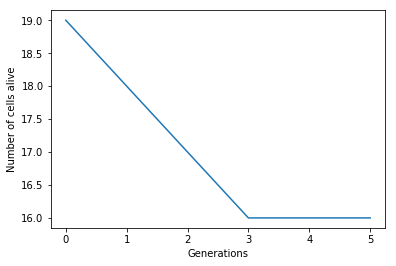

(16, 3)

In [23]:
genetic_algorithm_plot(10, 500, elite_size, mutation_rate, 6, 1)

In [24]:
def genetic_algorithm_m(matrix, population_size, elite_size, mutation_rate, generations, supergeneration):
    population = initialise_population(population_size)
    progress = []
    
    for i in range(0, generations):
        population, best_fitness, best_chromosome = next_generation(matrix, population, elite_size, mutation_rate, supergeneration)
        progress.append(best_fitness)
        
    print permutationth(best_chromosome)
    
    if supergeneration%2:
        matrix = margolus1(matrix, best_chromosome)
    else:
        matrix = margolus2(matrix, best_chromosome)
    
    return matrix, best_fitness, progress

In [25]:
def iterative_genetic_algorithm(supergenerations):
    matrix = create_matrix(10, 0.5)
    print(matrix)
    print("Original length: ", len(''.join([str(i) for n in matrix for i in n])))
    print("Original RLE length: ", len(encode(''.join([str(i) for n in matrix for i in n]))))
    progress = []
    for supergeneration in range(0, supergenerations):
        matrix, best_fitness, midprogress = genetic_algorithm_m(matrix, 1500, elite_size, mutation_rate, 7, supergeneration)
        #print(matrix)
        
        progress.extend(midprogress)
    
    print(progress)
    
    print("Final RLE length: ", len(encode(''.join([str(i) for n in matrix for i in n]))))
    print(matrix)
    
    plt.plot(progress)
    plt.ylabel('Number of cells alive')
    plt.xlabel('Generations')
    plt.show()

[[1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1]
 [0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0]
 [1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1]
 [0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0]
 [1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1]
 [0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1]
 [1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1]
 [0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1]
 [1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0]
 [0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1]
 [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1]
 [0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1]
 [1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1]
 [0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0]
 [0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0]
 [1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]]
('Original length: ', 400)
('Original RLE length: ', 222)
[7, 0, 1, 6, 11, 13, 14, 10, 2, 3, 8, 12, 15, 9, 4, 5]
[0, 15, 14, 4, 7, 9, 11, 1

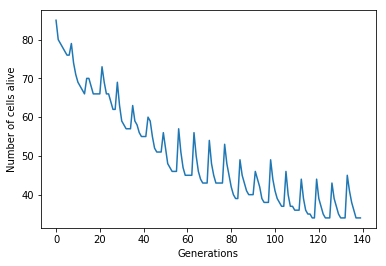

In [86]:
iterative_genetic_algorithm(100)

[[0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0]
 [0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
 [1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1]
 [0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0]
 [1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1]
 [1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1]
 [1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1]
 [1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0]
 [1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1]
 [1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1]
 [0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1]
 [0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
 [1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1]
 [1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0]]
('Original length: ', 400)
('Original RLE length: ', 197)
10460851109208
1048945076855
310212663079
243551662145
1296699805620
49900004338


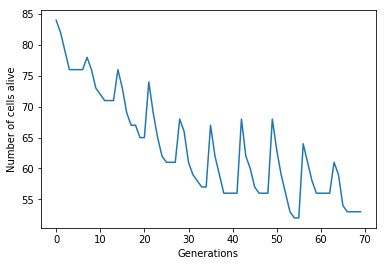

In [35]:
iterative_genetic_algorithm(10)

In [29]:
matrix = create_matrix(4, 0.5)
print(matrix)
print(margolus1(matrix, [6, 12, 14, 10, 13, 7, 0, 8, 5, 9, 11, 4, 3, 1, 15, 2]))
print(margolus2(matrix, [6, 12, 14, 10, 13, 7, 0, 8, 5, 9, 11, 4, 3, 1, 15, 2]))

[[0 1 1 0]
 [1 1 1 0]
 [1 0 0 1]
 [1 0 1 1]]
[[1 1 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [1 0 1 1]]
[[1 1 1 0]
 [1 0 1 1]
 [1 0 1 1]
 [1 1 1 0]]


### Function to represent RCA rule as an nth permutation
source: https://github.com/rob-smallshire/factoradic/blob/master/factoradic/convert.py

In [26]:
from math import factorial
from itertools import count

def to_factoradic(n):
    """Convert an integer to a factoradic number.
    Args:
        n: A non-negative integer to be converted.
    Returns:
        A sequence of integers where the factorial of each zero-based
        index gives a place value, and the item at that index is the
        coefficient by which the place value is to be multiplied. The
        sum of the multiples of the factorial place values is equal to
        the argument, n.  Since the coefficient at any index must be
        less that or equal to the index, the coefficient at index 0
        is always 0.
    Raises:
        ValueError: If n is negative.
        ValueError: If n is not integral.
        ValueError: If n is not finite.
    """
    if n < 0:
        raise ValueError("Negative number {} cannot be represented "
                         "as a factoradic number".format(n))

    try:
        v = int(n)
    except OverflowError:
        raise ValueError("Non-finite number {} cannot be represented "
                         "as a factoradic number".format(n))
    else:
        if v != n:
            raise ValueError("Non-integral {} cannot be represented "
                             "as a factoradic number".format(n))

    quotient = n
    coefficients = []
    for radix in count(start=1):
        quotient, remainder = divmod(quotient, radix)
        coefficients.append(remainder)
        if quotient == 0:
            break
    #return coefficients[::-1]
    return padzeroes(coefficients[::-1])

def padzeroes(coefficients):
    while len(coefficients) != 16:
        coefficients.insert(0, 0)
    return coefficients

def from_factoradic(coefficients):
    """Convert a sequence of factoradic coefficients to an integer.
    Args:
        coefficients: A sequence of integers where the factorial of
            each zero-based index gives a place value, and the item
            at that index is the coefficient by which the place value
            is to be multiplied.
    Returns:
        The integer equivalent of the factoradic representation.
    Raises:
        ValueError: If coefficients does not contain at least
            one element.
        ValueError: If not all elements in coefficients are
            less than or equal to their index values.
    """
    if len(coefficients) < 1:
        raise ValueError("coefficients {!r} does not contain at least one element".format(coefficients))
    if any(coefficient > index for index, coefficient in enumerate(coefficients)):
        raise ValueError("Not all coefficients in {!r} are less than or "
                         "equal to their index values.".format(coefficients))
    return sum(factorial(i)*v for i, v in enumerate(coefficients))

def nth(n):
    origin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    new = []
    og = origin[:]
    f = to_factoradic(n)
    #print(f)
    for i in f:
        #print(i, og)
        new.append(og[i])
        del og[i]
        #print(new, og)
        
    og.extend(new)
    return og

def permutationth(rule_list):
    origin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    c = 1
    n = 0
    for i in rule_list:
        #print(n, i, len(rule_list) - c)
        n += origin.index(i) * factorial(len(rule_list) - c)
        origin.remove(i)
        c += 1
    
    return n

### Testing functions

In [27]:
nth(56786678)

[0, 1, 2, 3, 5, 9, 12, 10, 8, 6, 11, 7, 14, 13, 4, 15]

In [28]:
permutationth(nth(3256786228))

3256786228